- title: SVD Series Part 2: Image Compression
- date: 2020-09-13 
- category: Numerical Analysis
- tags: linear algebra, compression
- slug: svd-image-compression
- authors: Anas Bouzid
- summary: In this example, we take an image of a flower and look at how well we can approximate it with truncated SVD matrices. From this approximation, we reconstructed the image and compare it to the original. By increasing the number of terms in the calculation, we can obtain a result with a degree of quality/detail that makes it almost indistinguishable from the original. However, as a compression algorithm, the goal is to obtain an image approximation that requires significantly less data (aforementioned terms) to describe it. 

## SVD application: Image Compression

In this example, we take an image of a flower and look at how well we can approximate it with truncated SVD matrices. We know that using the SVD matrices, we can expand the original data matrix in terms of matrices constructed by the rows and corresponding columns of the unitary matricies $U$ and $V^T$ where the coefficient in front of each term is determined by the $\Sigma$ matrix (the diagonal components). We also know that the first terms should contribute the most to reconstructing the image, but the more of these terms included, the closer to the original image we should get.


Before we execute the SVD operation, we need to import the image and make it black and white (so that we have a 2D matrix instead of 3D - RGB on the 3rd axis)


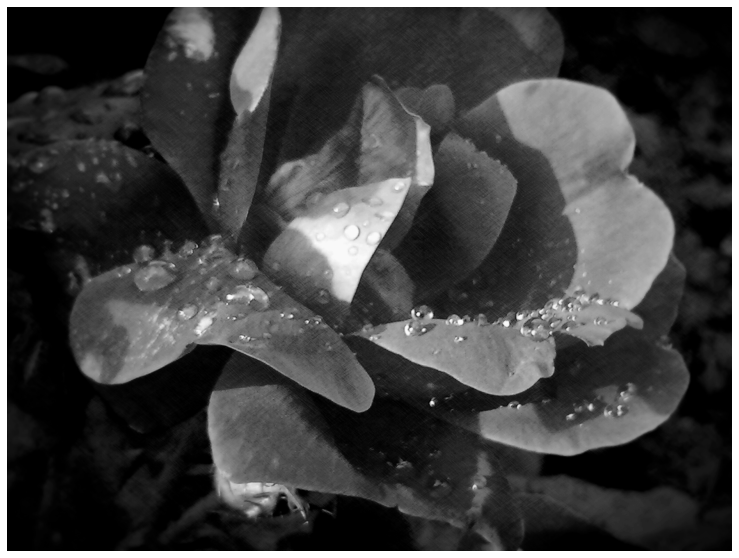

In [4]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize']=(20, 10)

A = io.imread('https://i.imgur.com/1POThYt.jpg')
X = np.mean(A, -1);

img = plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()




Now, we can perform the single value decomposition,





In [5]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)


We now reconstruct the original data matrix $X$ using only the first 5 terms of the expansion i.e. using the first 5 columns of $U$ and the first 5 rows of $V^T$,

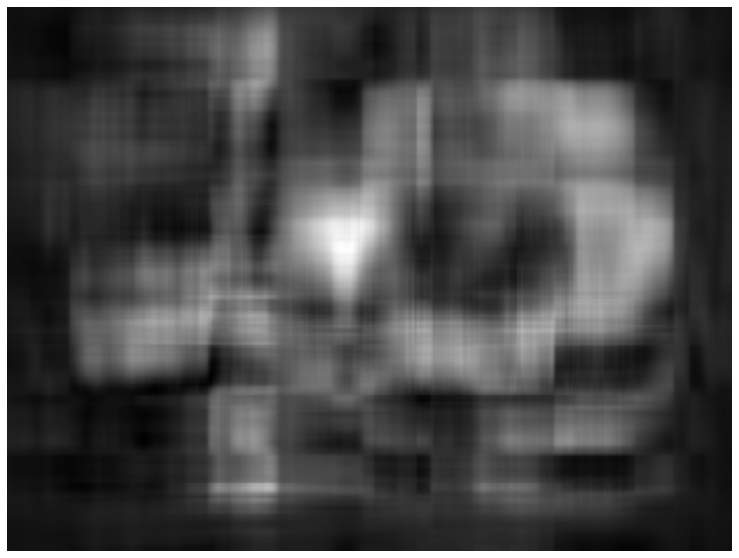

In [6]:
r=5

Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
## Alternatively,
#Xapprox = np.matmul(np.matmul(U[:,:r], S[:r,:r]),  VT[:r,:])

img = plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.show()


and using the first 10 terms of the expansion, we get:

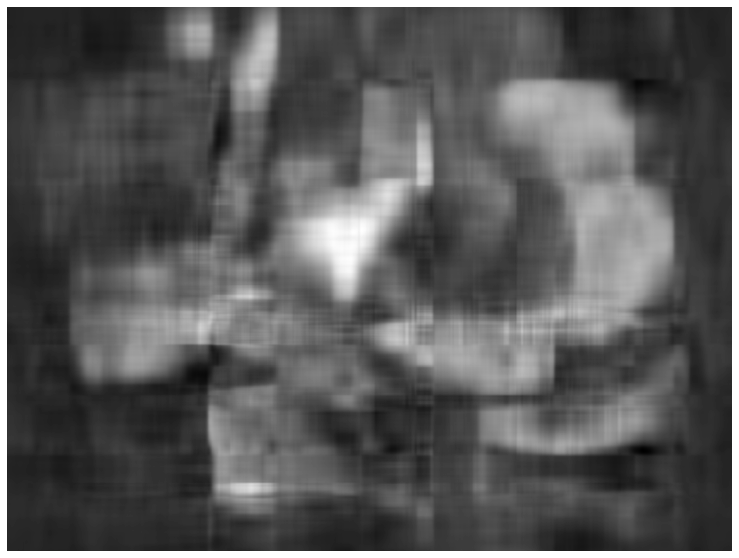

In [7]:
r=10

Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
img = plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.show()

Moving on to 20 terms,

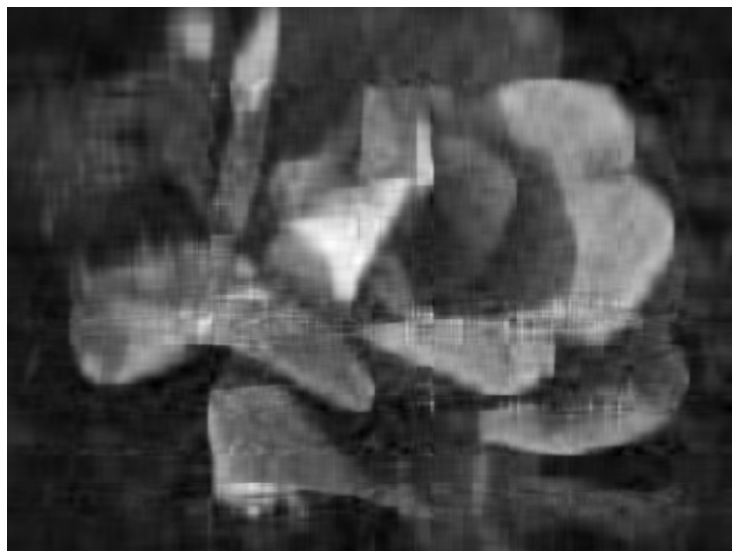

In [8]:
r=20

Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
img = plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.show()

and jumping to 100 terms, we get:

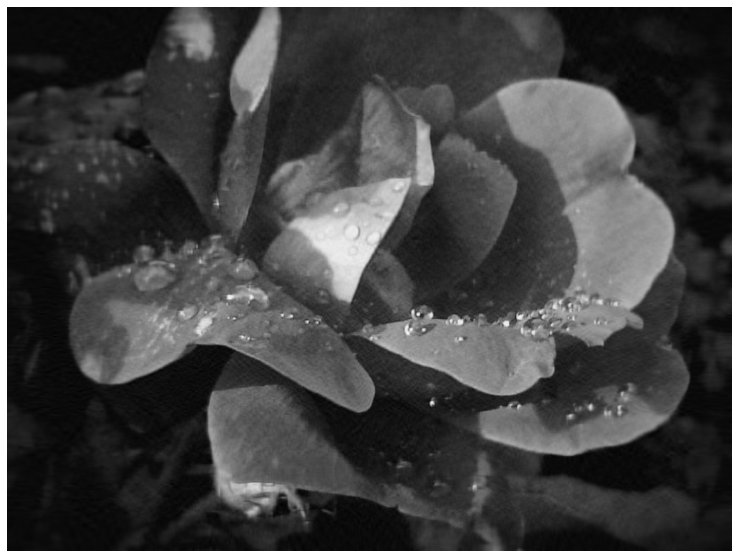

In [9]:
r=100

Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
img = plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.show()

As we can see, we have reconstructed the image with a degree of quality/detail that makes it almost indistinguishable from the original. However, and this is the goal of this example, this image approximation requires significantly less data to describe it. It requires 100 $n\times 1$ columns (of $U$) and 100 $1\times m$ rows (of $V^T$) and 100 individual values (from diagonal of $\Sigma$).

In [10]:
n = 2448
m = 3264
NumFull = m*n
NumFull

7990272

In [11]:
NumApprox = n*100 + m*100 + 100
NumApprox

571300

In [12]:
NumFull/NumApprox

13.986122877647471

For this $3264\times 2448$ image, $m = 3264$ and $n=2448$. This means that exactly $2448\times 100 + 3264\times 100 + 100 = 571300$ data values are needed to construct the approximate image above. The original image requires $7990272$ data values. That is a 13 to 1 compression ratio.

Note that the task of decompression is just the task of constructing $X$ from the truncated matrices $U$, $\Sigma$, and $V^T$

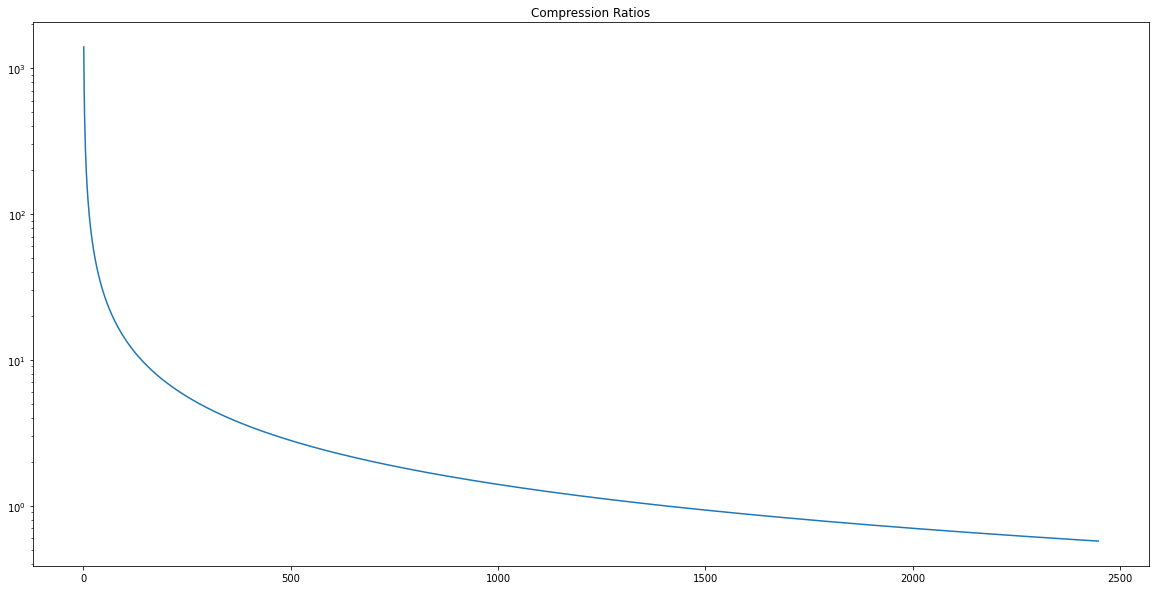

In [13]:
a = np.arange(1, n+1, 1)

b = n*a + m*a + a
b = (n*m)/b

plt.semilogy(a, b)
plt.title('Compression Ratios')
plt.show()

In [14]:
b[2447]

0.5713285489235078

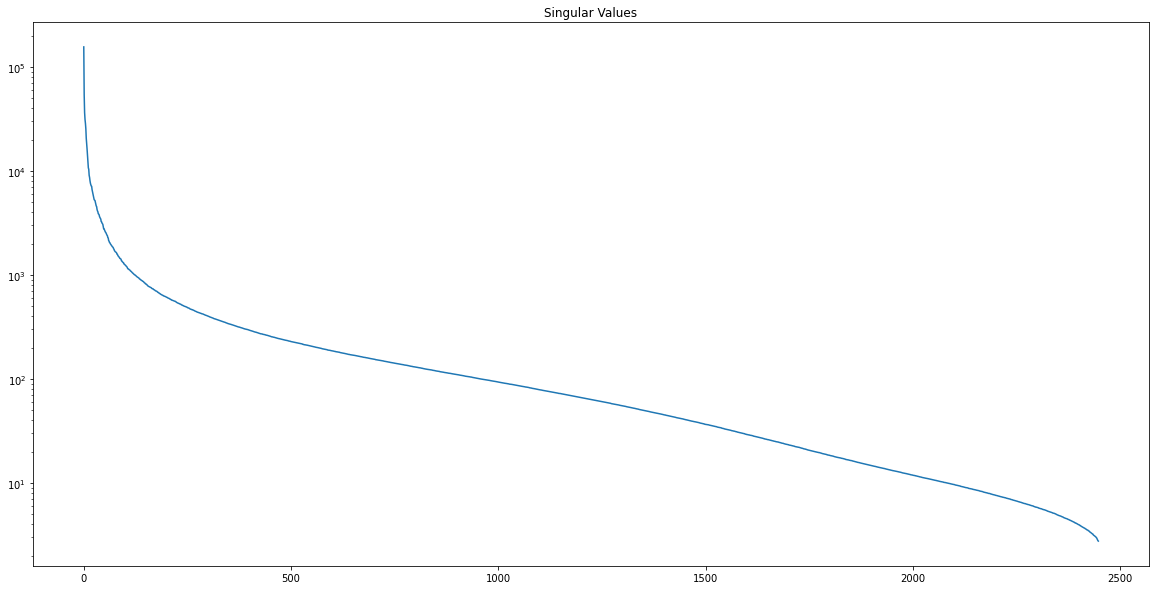

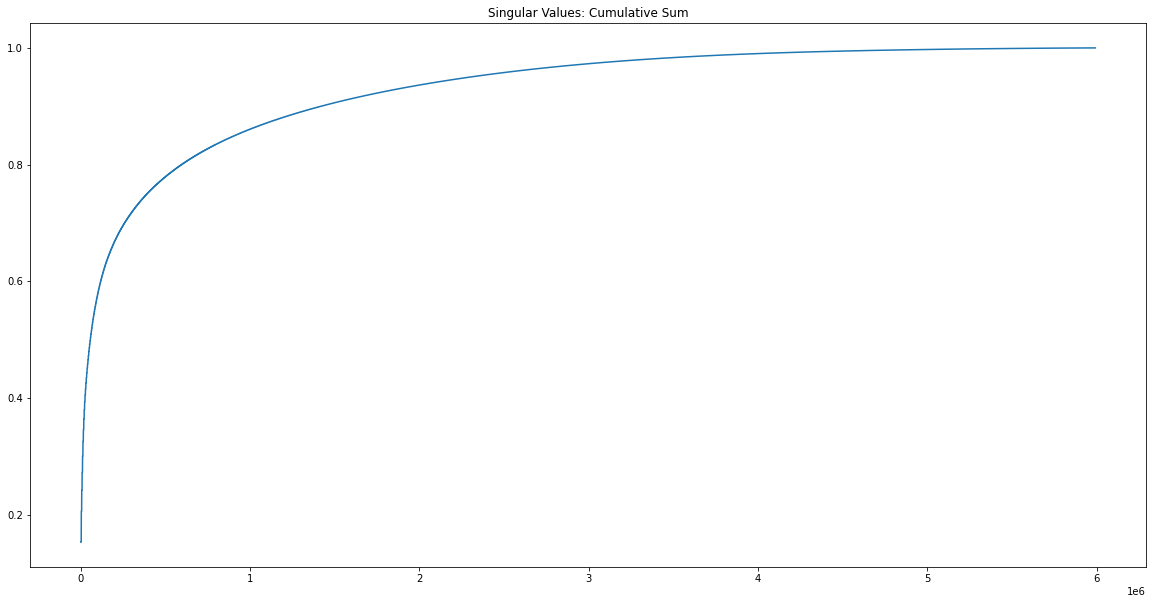

In [15]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Singular Values: Cumulative Sum')
plt.show()